In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drvedas-deep-learning-journey/README.md
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tum

In [2]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout 
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import ipywidgets as widgets
import io,os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

folder path train test

In [4]:
x_train = []
y_train = []
image_size = 150
labels =['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append (img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append (img)
        y_train.append(i)
        
x_train = np.array(x_train)
y_train= np.array(y_train)


In [5]:
x_train, y_train= shuffle (x_train,y_train,random_state=101)
x_train.shape

(3264, 150, 150, 3)

train test split

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train= y_train_new
y_train= tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test= y_test_new
y_test= tf.keras.utils.to_categorical(y_test)

Convolutional neural network

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history= model.fit(x_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-12-22 03:58:52.960907: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 18s 70ms/step - loss: 65.6268 - accuracy: 0.3515 - val_loss: 2606.1892 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 5s 54ms/step - loss: 677.1888 - accuracy: 0.3995 - val_loss: 9122.5967 - val_accuracy: 0.2007
Epoch 3/20
83/83 [==============================] - 5s 54ms/step - loss: 13104.8721 - accuracy: 0.3133 - val_loss: 7234.2798 - val_accuracy: 0.2891
Epoch 4/20
83/83 [==============================] - 4s 54ms/step - loss: 27277.9531 - accuracy: 0.2701 - val_loss: 5272.6479 - val_accuracy: 0.3129
Epoch 5/20
83/83 [==============================] - 5s 54ms/step - loss: 68268.2031 - accuracy: 0.2815 - val_loss: 817703.3750 - val_accuracy: 0.2619
Epoch 6/20
83/83 [==============================] - 4s 54ms/step - loss: 431948.7188 - accuracy: 0.2754 - val_loss: 14884768.0000 - val_accuracy: 0.2619
Epoch 7/20
83/83 [==============================] - 4s 54ms/step - loss: 443916.6250 - accuracy: 0.2830 - val_loss: 1600

In [12]:
model.save('Braintumor.keras')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

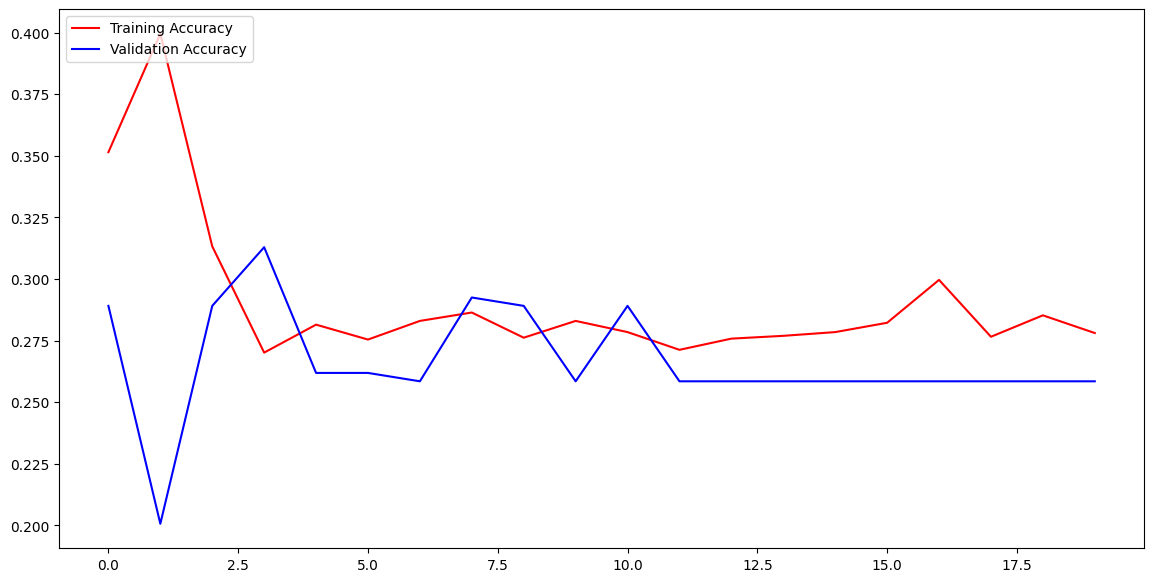

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

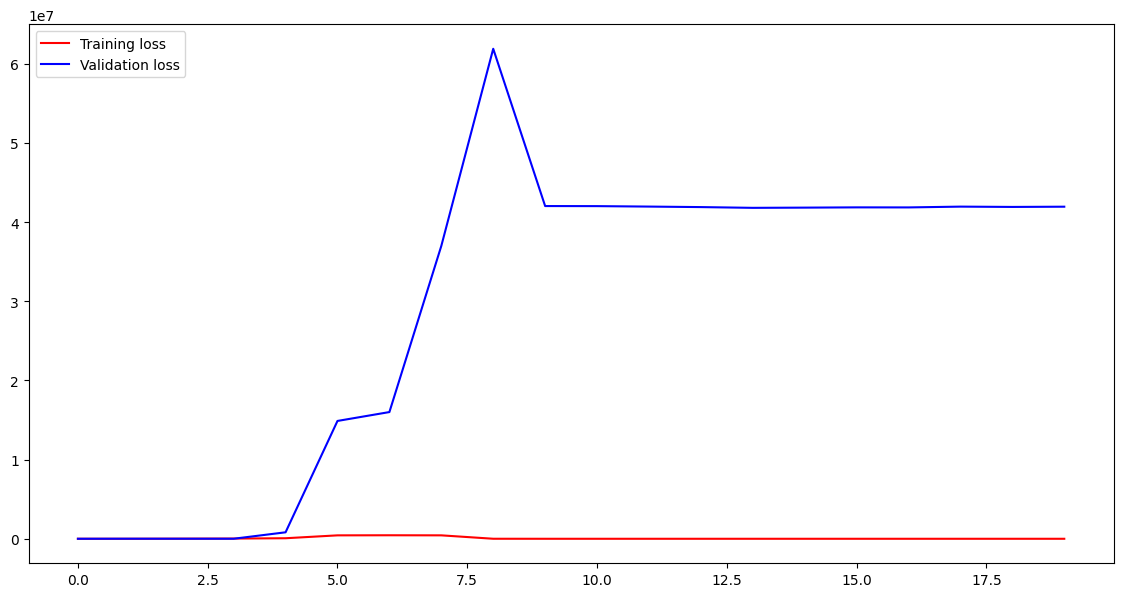

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

prediction

In [16]:
img=cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [17]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

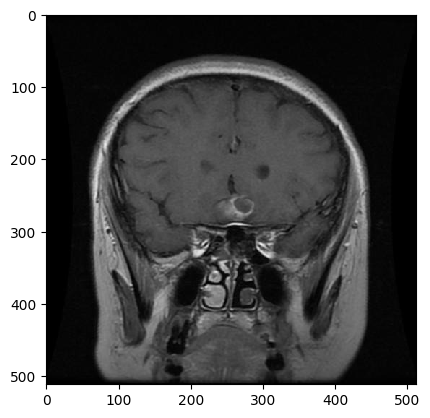

In [18]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [19]:
a=model.predict(img_array)
indices= a.argmax()
indices

1/1 [==============================] - 0s 296ms/step


0